In [22]:
from sklearn.module import Model
model = Model()
model.fit(X,y)
predictions = model.predict(X_new)
predictions

ModuleNotFoundError: No module named 'sklearn.module'

In [5]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv('telecom_churn_clean.csv')
diabetes_df = pd.read_csv('diabetes_clean.csv')

In [6]:
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values

# X = churn_df.drop("churn", axis=1).values
# y = churn_df["churn"].values

print(X.shape, y.shape)
# Pandas DataFrame.values attribute return a Numpy representation of the given DataFrame

(3333, 2) (3333,)


# k-Nearest Neighbors, KNN, classification
Predict the label of any data point by looking at the k, for example, three, closest labeled data points and getting them to vote on what label the unlabeled observation should have
- KNN uses distance explicitly, needed scaling

In [7]:
from sklearn.neighbors import KNeighborsClassifier 
X = churn_df[['total_day_charge', 'total_eve_charge']].values
y = churn_df['churn'].values
X_new = np.array([[56.8, 17.5],
                  [24.4, 24.1],
                  [50.1, 10.9]])
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X,y)
predictions = knn.predict(X_new)
print("Predictions: {}".format(predictions)) 

Predictions: [1 0 0]


# Train/test split

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21, stratify=y)

# stratify - to ensure our split reflects the proportion of labels in our data

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

# Measuring model performance - classification
Accuracy (tp+tn)/(tp+tn+fp+fn)

In [9]:
accuracy = knn.score(X_test, y_test)
print("Accuracy: {}".format(accuracy)) 

Accuracy: 0.872


Confusion matrix

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
confusion_matrix

array([[836,  19],
       [109,  36]], dtype=int64)

In [11]:
c=classification_report(y_test, predictions)
print(c)

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       855
           1       0.65      0.25      0.36       145

    accuracy                           0.87      1000
   macro avg       0.77      0.61      0.64      1000
weighted avg       0.85      0.87      0.85      1000



precision tp/(tp+fp)

recall = sensitivity tp/(tp+fn)

F1 score = precision * recall / (precision +recall)

# Over/underfitting

In [12]:
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1,26)

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train,y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)


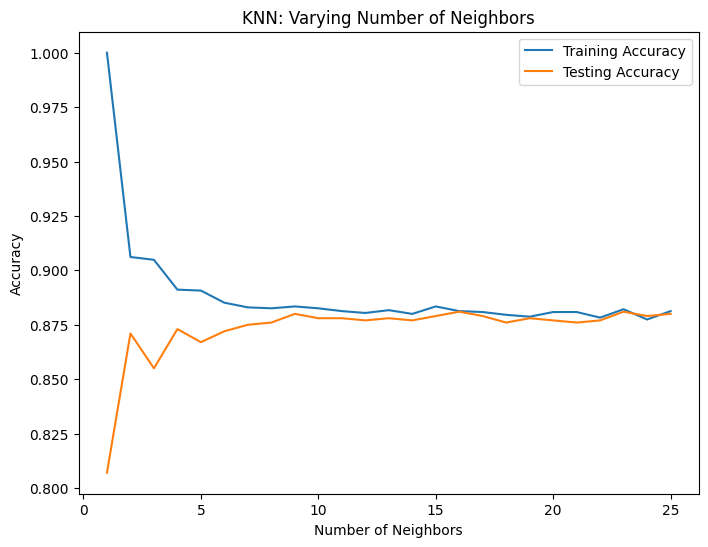

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label = "Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label = "Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# Regression

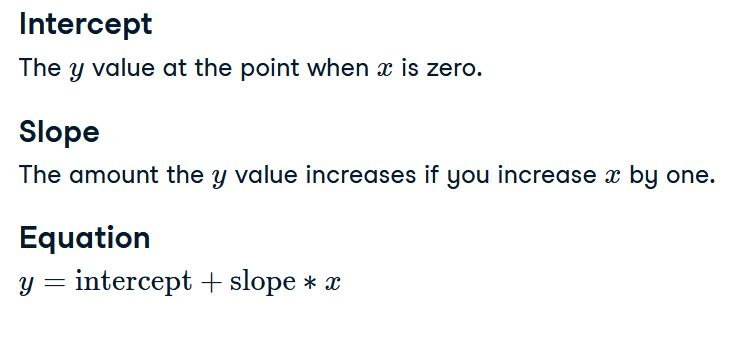

In [14]:
from PIL import Image 
from IPython.display import display
img = Image. open('reg.jpg')
display(img)

In [15]:
diabetes_df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
X_bmi = X[:,3]
print(y.shape, X_bmi.shape)
X_bmi = X_bmi.reshape(-1,1)
print(y.shape, X_bmi.shape)
# X has to be as a two-dimensional array

(768,) (768,)
(768,) (768, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

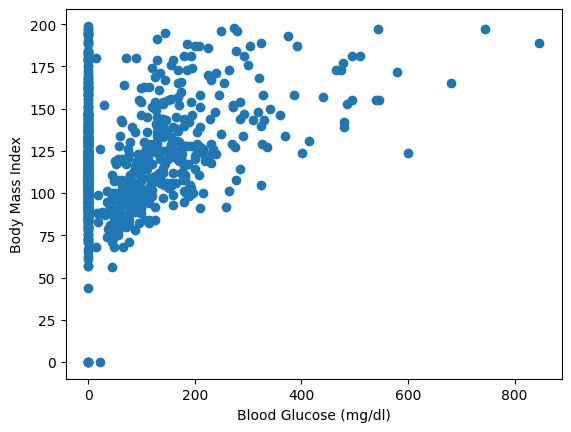

In [17]:
plt.scatter(X_bmi,y)
plt.xlabel("Blood Glucose (mg/dl)")
plt.ylabel("Body Mass Index")
plt.show

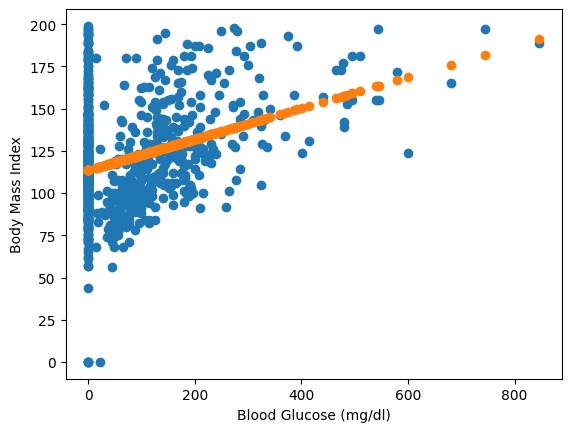

In [18]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_bmi,y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi,y)
plt.scatter(X_bmi,predictions)
plt.xlabel("Blood Glucose (mg/dl)")
plt.ylabel("Body Mass Index")
plt.show()

In [19]:
reg.predict(X_bmi)[0]

113.55858366988062

In [20]:
reg.coef_ @ X_bmi[0] + reg.intercept_

113.55858366988062

In [21]:
# Linear regression using all features
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)
reg_all = LinearRegression()
reg_all.fit(X_train,y_train)
predictions = reg_all.predict(X_test)

# Measuring model performance - regression
R square

In [22]:
reg_all.score(X_test,y_test)

0.28701582460171704

MSE, RMSE

In [23]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,predictions, squared = True)

RMSE = mean_squared_error(y_test,predictions, squared = False)
print(f'MSE: {MSE}, RMSE: {RMSE}')

MSE: 636.8297799182925, RMSE: 25.235486520340608


# Cross-validation, k-fold CV

In [24]:
from sklearn.model_selection import cross_val_score, KFold
# KFold - for shuffle data
# shuffle = True - it shuffles data before spliting
# reported score = R squared, to change "scoring='neg_mean_absolute_error"
kf = KFold(n_splits=6,shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg,X,y,cv=kf)
print(cv_results)
print(f'Mean: {np.mean(cv_results)}, Std: {np.std(cv_results)}')
print(f'(95% confidence: {np.quantile(cv_results, [0.025,0.975])})')

[0.26207548 0.28228176 0.41203082 0.23785884 0.41634629 0.30398869]
Mean: 0.3190969786734479, Std: 0.0701532061011419
(95% confidence: [0.24088592 0.41580685])


In [25]:
# from sklearn.model_selection import cross_val_score, ShuffleSplit
# kf = ShuffleSplit(n_splits=10,test_size=0.33,random_state=42)

In [26]:
for train_index, test_index in kf.split(diabetes_df):
    cv_train, cv_test = diabetes_df.iloc[train_index],diabetes_df.iloc[test_index]

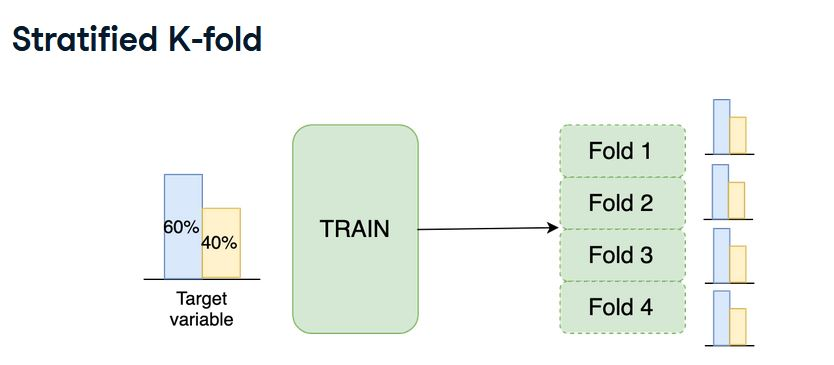

In [27]:
from PIL import Image 
from IPython.display import display
img = Image. open('skfold.jpg')
display(img)

In [34]:
from sklearn.model_selection import StratifiedKFold
str_kf = StratifiedKFold(n_splits=6,shuffle=True, random_state=42)

for train_index, test_index in str_kf.split(diabetes_df,diabetes_df["glucose"].values):
    cv_train, cv_test = diabetes_df.iloc[train_index],diabetes_df.iloc[test_index]

C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


In [1]:
from sklearn.model_selection import TimeSeriesSplit
time_kf = TimeSeriesSplit(n_splits=6)
# train = train.sort_values('date')
# for train_index, test_index in str_kf.split(train):
#     cv_train, cv_test = train.iloc[train_index],train.iloc[test_index]

## Validation pipline

In [4]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

diabetes_df = pd.read_csv('diabetes_clean.csv')

model = LinearRegression()
kf = KFold(n_splits=6,shuffle=True, random_state=42)
fold_metrics = []

for train_index, test_index in kf.split(diabetes_df):
    cv_train, cv_test = diabetes_df.iloc[train_index],diabetes_df.iloc[test_index]
    
    cv_train_X = cv_train.drop("glucose", axis=1).values
    cv_train_y = cv_train["glucose"].values
    
    cv_test_X = cv_test.drop("glucose", axis=1).values
    cv_test_y = cv_test["glucose"].values
    
    model.fit(cv_train_X,cv_train_y)
    predictions = model.predict(cv_test_X)
    metric = mean_squared_error(cv_test_y,predictions)
    fold_metrics.append(metric)
    
mean_score = np.mean(fold_metrics)
mean_score

690.1430428721154

In [6]:
overall_score_minimizing = np.mean(fold_metrics)- np.std(fold_metrics)
overall_score_maximizing = np.mean(fold_metrics)+ np.std(fold_metrics)
print(f'{overall_score_minimizing} - {overall_score_maximizing}')

574.0744240723118 - 806.211661671919


# Regularized regression
- a technique used to avoid overfitting

Ridge L2
- change the loss function so that it penalizes large coefficients
- alfa (you can choose) * coefficient squared + loss function
- The larger the alpha value, the more aggressive the penalization

In [22]:
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_train,y_train)
    predictions = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
scores

[0.28718210812881373,
 0.2886488453855751,
 0.30075083865691343,
 0.3266444676302307,
 0.2903861817405353]

Lasso L1
- alfa (you can choose) * |coefficient| + loss function
- it tends to shrink the coefficients of less important features to zero

In [23]:
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train,y_train)
    predictions = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
scores

[0.28761806147817415,
 0.3298222738388288,
 0.2621354084106098,
 0.2437901341500236,
 0.19875769891921435]

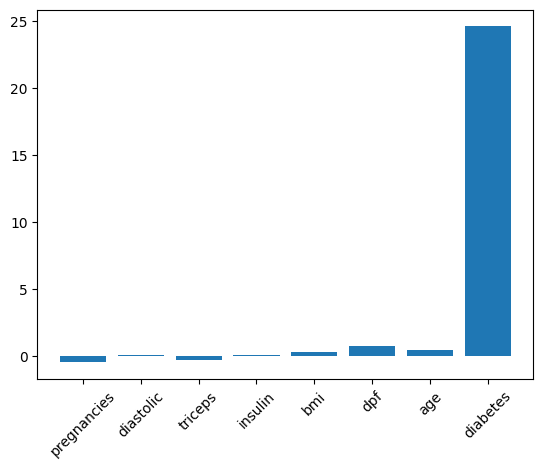

In [24]:
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha = 0.1)
lasso.fit(X,y)
lasso_coef = lasso.coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

# Logistic regression, classification
- This model calculates the probability

In [25]:
from sklearn.linear_model import LogisticRegression

# random_state=30, max_iter=500
log_reg = LogisticRegression(max_iter=10000)

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)
pred_probability = log_reg.predict_proba(X_test)

# ROC curve
- to visualize how different thresholds affect true positive and false positive rates
- fpr = FP/(FP+TN)
- tpr = recall = TP(TP+FP)

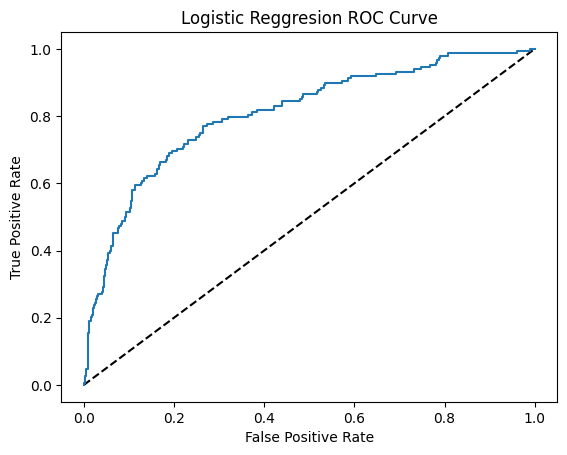

In [26]:
from sklearn.metrics import roc_curve
fpr, tpr, treshold = roc_curve(y_test, pred_probability[:,1])
# roc_curve(y_test, pred_probability[:,1]) - probability of 1  
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Reggresion ROC Curve')
plt.show()

AUC
- we calculate the area under the ROC curve
- 0 to 1

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred_probability[:,1])

0.8078368861819565

# Logistic regression and regularization
### C
- larger C means less regularization - coefficient smaller
- smaller C means more regularization - coefficient bigger
- generally weaker regularization has higger accuracy of training data
- strong regularization improve the score of text data
- regularized loss = original loss + large coefficient penalty
### Coefficient
- smaller coefficients mean less confident predictions
- there's a connection between overconfidence and overfitting
- the sigmoid function "squash" the raw model output to be between 0 and 1.

### SUM UP
smaller values of C lead to less confident predictions. That's because smaller C means more regularization, which in turn means smaller coefficients, which means raw model outputs closer to zero and, thus, probabilities closer to 0.5 after the raw model output is squashed through the sigmoid function

In [28]:
log_weak_reg = LogisticRegression(C=100, max_iter=10000)
log_strong_reg = LogisticRegression(C=0.01, max_iter=10000)

log_weak_reg.fit(X_train, y_train)
log_strong_reg.fit(X_train, y_train)

lwgs = log_weak_reg.score(X_train, y_train)
lsgs = log_strong_reg.score(X_train, y_train)
print(lwgs, lsgs)

lwgst = log_weak_reg.score(X_test, y_test)
lsgst = log_strong_reg.score(X_test, y_test)
print(lwgst, lsgst)

0.8632661808829832 0.8658379768538362
0.865 0.861


In [29]:
lr_l1 = LogisticRegression(solver = 'liblinear', penalty = 'l1', max_iter=10000)
lr_l2 = LogisticRegression( max_iter=10000) # penalty = 'l1' by default

lr_l1.fit(X_train, y_train)
lr_l2.fit(X_train, y_train)

l1s = lr_l1.score(X_train, y_train)
l2s = lr_l2.score(X_train, y_train)
print(l1s, l2s)

l1st = lr_l1.score(X_test, y_test)
l2st = lr_l2.score(X_test, y_test)
print(l1st, l2st)

0.8645520788684098 0.8636948135447922
0.865 0.865


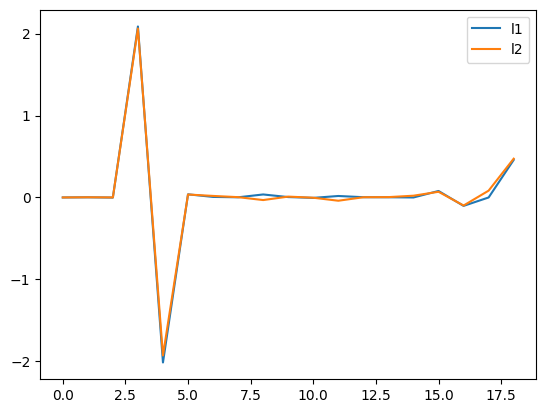

In [30]:
plt.plot(lr_l1.coef_.flatten())
plt.plot(lr_l2.coef_.flatten())
plt.legend(("l1", "l2"))
plt.show()

In [100]:
print(lr_l1.coef_.size, lr_l2.coef_.size)

19 19


In [101]:
print(np.count_nonzero(lr_l1.coef_),np.count_nonzero(lr_l2.coef_))

18 19


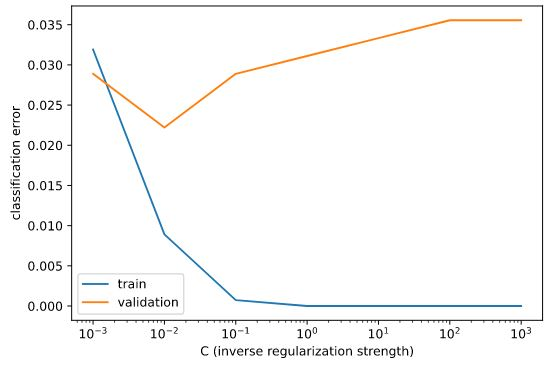

In [96]:
from PIL import Image 
from IPython.display import display
img = Image. open('regularization.jpg')
display(img)

# Hyperparameter tuning
- KNN, we choose n_neighbors
- choose a value for alpha in ridge and lasso regression

# GridSearchCV

In [128]:
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=5,shuffle=True, random_state=42)
param_grid = {'alpha':np.arange(0.0001,1,10),
         'solver': ['sag', 'lsqr']}
ridge = Ridge(max_iter=500000)
ridge_cv = GridSearchCV(ridge, param_grid=param_grid, cv = kf)
ridge_cv.fit(X_train, y_train)

print("The best parameters are: ", ridge_cv.best_params_)
print("The best score is: ", ridge_cv.best_score_)



The best parameters are:  {'alpha': 0.0001, 'solver': 'sag'}
The best score is:  0.13574603561009424


# RandomizedSearchCV

In [130]:
from sklearn.model_selection import RandomizedSearchCV

kf = KFold(n_splits=5,shuffle=True, random_state=42)
param_grid = {'alpha':np.arange(0.0001,1,10),
         'solver': ['sag', 'lsqr']}
ridge = Ridge(max_iter=500000)
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv = kf, n_iter = 2)
ridge_cv.fit(X_train, y_train)

print("The best parameters are: ", ridge_cv.best_params_)
print("The best score is: ", ridge_cv.best_score_)



The best parameters are:  {'solver': 'sag', 'alpha': 0.0001}
The best score is:  0.13574797588837526


In [132]:
test_score = ridge_cv.score(X_test,y_test)
print(test_score)

0.1579436780258443


# Dummy variable
- scikit-learn: OneHotEncoder
- pandas: get_dummies
- manual

In [138]:
music_df = pd.read_csv('music_clean.csv')

In [ ]:
music_dummies = pd.get_dummies(music_df['genre'], drop_first = True) # each genre own column
music_dummies = pd.concat([music_df, music_dummies], axis =1) # add to rest of the file

In [ ]:
music_dummies = music_dummies.drop('genre', axis = 1)

In [ ]:
# one categorical feature
music_dummies = pd.get_dummies(music_df, drop_first = True)

In [ ]:
# manual
music_dummies['genre'] = np.where(music_df['genre'] = 'Rock',1,0)
# if it is Rock convert to 1 other case to 0

# Missing data
- to remove missing observations accounting for less than 5% of all data
- to impute missing data by mean, median, for categorical by moda

In [146]:
# identifying how many row is missing
print(music_df.isna().sum().sort_values())

Unnamed: 0          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
genre               0
dtype: int64


In [ ]:
music_df = music_df.dropna(subset = ['popularity','energy', 'tempo' ])

In [ ]:
from sklearn.impute import SimpleImputer
X_cat = music_df['genre'].values.reshape(-1,1)
X_num = music_df.drop(['genre', 'popularity'], axis = 1).values
y = music_df['popularity'].values
X_train_cat ,X_test_cat ,y_train,y_test = train_test_split(X_cat,y,test_size=0.2,random_state=12)
X_train_num ,X_test_num ,y_train,y_test = train_test_split(X_num,y,test_size=0.2,random_state=12)

imp_cat = SimpleImputer(strategy = 'most_frequent')
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

imp_num = SimpleImputer() # mean by deafult
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)

X_train = np.append(X_train_cat,X_train_num, axis = 1)
X_test = np.append(X_test_cat,X_test_num, axis = 1)

# Pipline

In [153]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
steps = [('imputation', SimpleImpute()),
        ('logistic_regression', LogisticRegression())]
pipeline = Pipeline(steps)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=21)

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

# Centering (standardize) and scaling (normalize)

In [147]:
music_df[['duration_ms', 'loudness', 'speechiness']].describe()

,duration_ms,loudness,speechiness
count,1.000000e+03,1000.000000,1000.000000
mean,2.172204e+05,-8.253305,0.077879
std,1.175582e+05,5.158523,0.089451
min,-1.000000e+00,-38.718000,0.023400
25%,1.806562e+05,-9.775500,0.033100
50%,2.163000e+05,-6.855000,0.043600
75%,2.605025e+05,-4.977750,0.074950
max,1.617333e+06,-0.883000,0.710000


Standardization
- subtract the mean and divide by the variance so that all features are centered around zero and have a variance of one

In [148]:
from sklearn.preprocessing import StandardScaler

In [165]:
X = music_df.drop('genre', axis = 1).values
y = music_df['genre'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

20666.582585618085 68890.98734103922
3.397282455352979e-16 0.9999999999999998


In [182]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors = 6))]
pipeline = Pipeline(steps)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

knn_scaled = pipeline.fit(X_train, y_train)
knn_scaled_pred = pipeline.predict(X_test)
print(pipeline.score(X_test, y_test))

0.91


In [183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
knn_not_scaled = KNeighborsClassifier(n_neighbors = 6)
knn_not_scaled.fit(X_train, y_train)
knn_not_scaled_pred = knn_not_scaled.predict(X_test)
print(knn_not_scaled.score(X_test, y_test))

0.885


# GridSearch, StandardScaler, Piepline, KFold

In [184]:
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {'knn__n_neighbors': np.arange(1,50)} # double__ becouse it comes from pipeline
kf = KFold(n_splits=5,shuffle=True, random_state=42)
cv = GridSearchCV(pipeline, param_grid=parameters, cv = kf)
cv.fit(X_train, y_train)
print(cv.best_score_)

0.91375


In [186]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)
grid = GridSearchCV(pipeline, param_grid=parameters)
grid.fit(X_train, y_train)
print(grid.best_score_)

0.9099999999999999


Afected by scaling data:
- KNN,
- linear regression (Ridge, Lasso),
- logistic regression,
- Artificial Neutral Network.

# Evaluating classification models

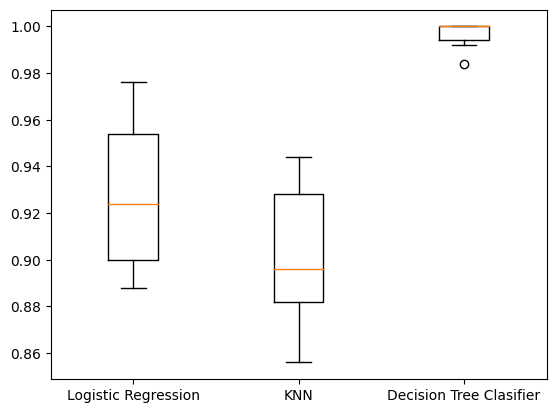

In [191]:
from sklearn.tree import DecisionTreeClassifier 
X = music_df.drop('genre', axis = 1).values
y = music_df['genre'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
models = {'Logistic Regression': LogisticRegression(), 'KNN': KNeighborsClassifier(),
          'Decision Tree Classifier': DecisionTreeClassifier()}
results = []
for model in models.values():
    kf = KFold(n_splits=6,shuffle=True, random_state=42)
    cv_results = cross_val_score(model,X_train_scaled,y_train,cv=kf)
    results.append(cv_results)
    
plt.boxplot(results, labels = models.keys())
plt.show()

In [192]:
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    print("{} Test Set Accuracy: {}".format(name,test_score))

Logistic Regression Test Set Accuracy: 0.864
KNN Test Set Accuracy: 0.888
Decision Tree Clasifier Test Set Accuracy: 1.0


# SVM - Support Vector Machines
Support Vector Classification

In [119]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()

In [2]:
from sklearn.svm import LinearSVC
svm  = LinearSVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# accuracy_train = accuracy_score(y_train, svc.predict(X_train))
# accuracy_test = accuracy_score(y_test, svc.predict(X_test))


C:\Users\AsusF512ua-ej269t\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9438202247191011

In [3]:
from sklearn.svm import SVC
svm  = SVC()
svm.fit(wine.data, wine.target)
svm.score(wine.data, wine.target)

0.7078651685393258

# Dot product - iloczyn skalarny

In [6]:
import numpy as np
x = np.arange(3)
x

array([0, 1, 2])

In [7]:
y = np.arange(3,6)
y

array([3, 4, 5])

In [8]:
x*y

array([ 0,  4, 10])

In [9]:
np.sum(x*y)

14

In [10]:
x@y

14

In [11]:
x.dot(y)

14

In [12]:
y.dot(x)

14

 "raw model output" = coefficients * features + intercept

In [39]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression()
reg.fit(X_bmi,y)
print(reg.predict(X_bmi)[0],reg.coef_ @ X_bmi[0] + reg.intercept_)

113.55858366988062 113.55858366988062


In [44]:
reg.coef_

array([0.09192977])

# Minimze classification loss function

In [62]:
from scipy.optimize import minimize
minimize(np.square,0).x
# minimize(function,target).value

array([0.])

# Combining binary classifiers with one-vs-rest

In [ ]:
lr0 = LogisticRegression()
lr1 = LogisticRegression()
lr2 = LogisticRegression()

lr0.fit(X, y==0)
lr1.fit(X, y==1)
lr2.fit(X, y==2)

# the higest row model output
ldf0 = lr0.decision_function(X)[0]
ldf1 = lr1.decision_function(X)[0]
ldf2 = lr2.decision_function(X)[0]
print(ldf0,ldf1, ldf2)

# the correct class is with the highest score

In [112]:
lrm = LogisticRegression(multi_class = 'ovr',max_iter=10000)
lrm.fit(X,y)
lrm.predict(X)[0]

0

### multinomial/softmax

In [115]:
lr_mulitnominal = LogisticRegression(multi_class = 'multinomial',max_iter=10000)
lr_mulitnominal.fit(X,y)
lr_mulitnominal.predict(X)[0]

0

In [118]:
print(lr_mulitnominal.coef_.shape, lr_mulitnominal.intercept_.shape)
# with 3 classes it would be shape 3

(1, 19) (1,)


# SVM theory
- hinge loss
- L2 regularization
- support vector = an example that is incorrectly classified or close to the boundary
- If an example is not a support vector, removing it has no effect on the model, because its loss was already zero
- SVMs maximize the margin of linearly separable datasets

In [123]:
# Train a linear SVM
svm = SVC(kernel="linear")
svm.fit(wine.data, wine.target)

# Make a new data set keeping only the support vectors
print("Number of original examples", len(wine.data))
print("Number of support vectors", len(svm.support_))
X_small = wine.data[svm.support_]
y_small = wine.data[svm.support_]

Number of original examples 178
Number of support vectors 22


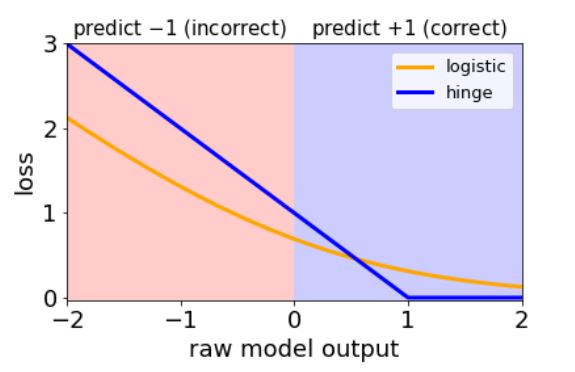

In [124]:
img2 = Image. open('hinge.jpg')
display(img2)

### Kernel = transforming feautures
- It's that fitting a linear model in a transformed space corresponds to fitting a nonlinear model in the original space.
- gamma is only applies to the RBF kernel and controls the smoothness.

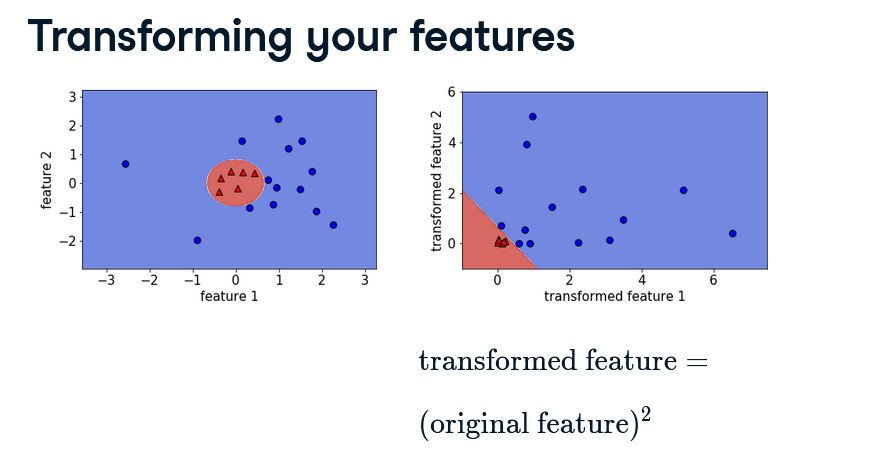

In [125]:
img3 = Image. open('kernel.jpg')
display(img3)

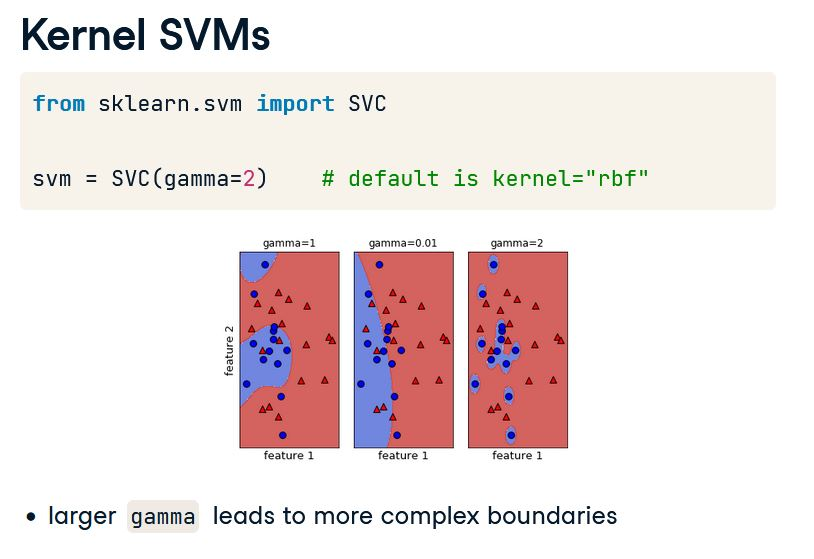

In [127]:
img4 = Image. open('gamma.jpg')
display(img4)

# Linear clasifiers:
 - SVM
- Logistic Regression

# SGDClassifier - stochastic gradient descent
-  to switch between logistic regression and a linear SVM, one only has to set the loss hyperparameter
- regularization hyperparameter is called alpha instead of C, and bigger alpha means more regularization

In [130]:
from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(loss='log_loss')
linsvm = SGDClassifier(loss='log_loss')